---------------
## Visualization - Day6 HW

## Homework 6

Import the medical costs dataset:

https://www.kaggle.com/datasets/mirichoi0218/insurance

at this point you should be able to write code using what is provided on kagglehub and pandas to read in the data as a DataFrame. Remember one helpful command

    os.listdir(path)

to list the names of the files that you downloaded.

You job is to:

1.  Do basic EDA - value counts, nan counts, and statistics
2.  Try out a pairplot - comment on any trends, outliers, or interesting distributions.
3. Make a few plots of your own exploring the data. For example:

- Age vs Charges - comment on what you see: correlation, groups, etc
- Age vs BMI - make a plot for men and women separately or smokers vs non-smokers.
- Visualization of who is charged more on average: men, women, smokers, non-smokers? 
- Visualization of the max or min or total or average charges across age bins: children, young adults, adults, or elderly. You choose the cutoffs.
- Visualization of how the regions might affect your graphs above.

For part 3, your goal is to make multiple plots. You don't have to answer every question, but really try to practice all of the ideas from lecture. You must use each of the following at least once:

1. Plotly
2. Matlplotlib
3. Seaborn

(extra) Pandas

(extra) Bokeh
    
------------------------------------

Your final notebooks should:

- [ ] Be a completely new notebook with just the Day6 stuff in it: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

In [38]:
!conda install -y seaborn
!conda install -y bokeh

Jupyter detected...
2 channel Terms of Service accepted
doneieving notices: - 
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): / 
doneing environment: \ 

# All requested packages already installed.

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: / 

# All requested packages already installed.



In [39]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

### Kaggle_Import

import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

In [40]:
file='/Users/anika_tabassum/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1/'
import os #helping me to see my downloaded file name
os.listdir(file)

['insurance.csv']

### Read and Load Kaggle Data

In [41]:
df = pd. read_csv(file+'insurance.csv')

In [43]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 1.  Do basic EDA - value counts, nan counts, and statistics


This dataset has 1338 observations and 7 variables.

In [44]:
#value count
# Categorical columns: sex, smoker, region
print("Sex counts:\n", df["sex"].value_counts(), "\n")
print("Smoker counts:\n", df["smoker"].value_counts(), "\n")
print("Region counts:\n", df["region"].value_counts(), "\n")


Sex counts:
 sex
male      676
female    662
Name: count, dtype: int64 

Smoker counts:
 smoker
no     1064
yes     274
Name: count, dtype: int64 

Region counts:
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64 



Value Counts: 
Sex:
Male = 676, Female = 662
Balanced distribution, almost equal.
Smoker:
No = 1064, Yes = 274
Non-smokers dominate (about 80%), smokers are a minority (~20%).
Region:
Southeast = 364, Southwest = 325, Northwest = 325, Northeast = 324
Very balanced — dataset seems stratified by region.

In [45]:
#Nan Count
print("Missing values per column:\n", df.isna().sum())

Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Missing Values:
All columns have 0 missing values.
This is great — dataset is clean and ready for analysis.

In [46]:
#Statistics
print(df.describe().T)   # transpose for readability

           count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801  


Interpretation of Statistics:

Age
Mean = ~39 years
Range = 18–64
Spread is wide but balanced; most people are mid-20s to early-50s.

BMI (Body Mass Index)
Mean = ~30.7 → slightly overweight on average
Range = 15.96–53.13 → includes underweight and some extremely high outliers (>50).
75% quartile ≈ 34.7 → many people are overweight/obese.

Children
Mean = ~1.1, max = 5
Most people have 0–2 children (median = 1, 75% = 2).

Charges
Mean = ~$13.3k
Range = $1.1k – $63.7k → very skewed
Median = ~$9.4k, but 25% pay < $4.7k, while some pay > $63k

Suggests a few individuals (likely smokers, high BMI, older) drive up costs.

### 2.  Try out a pairplot - comment on any trends, outliers, or interesting distributions.

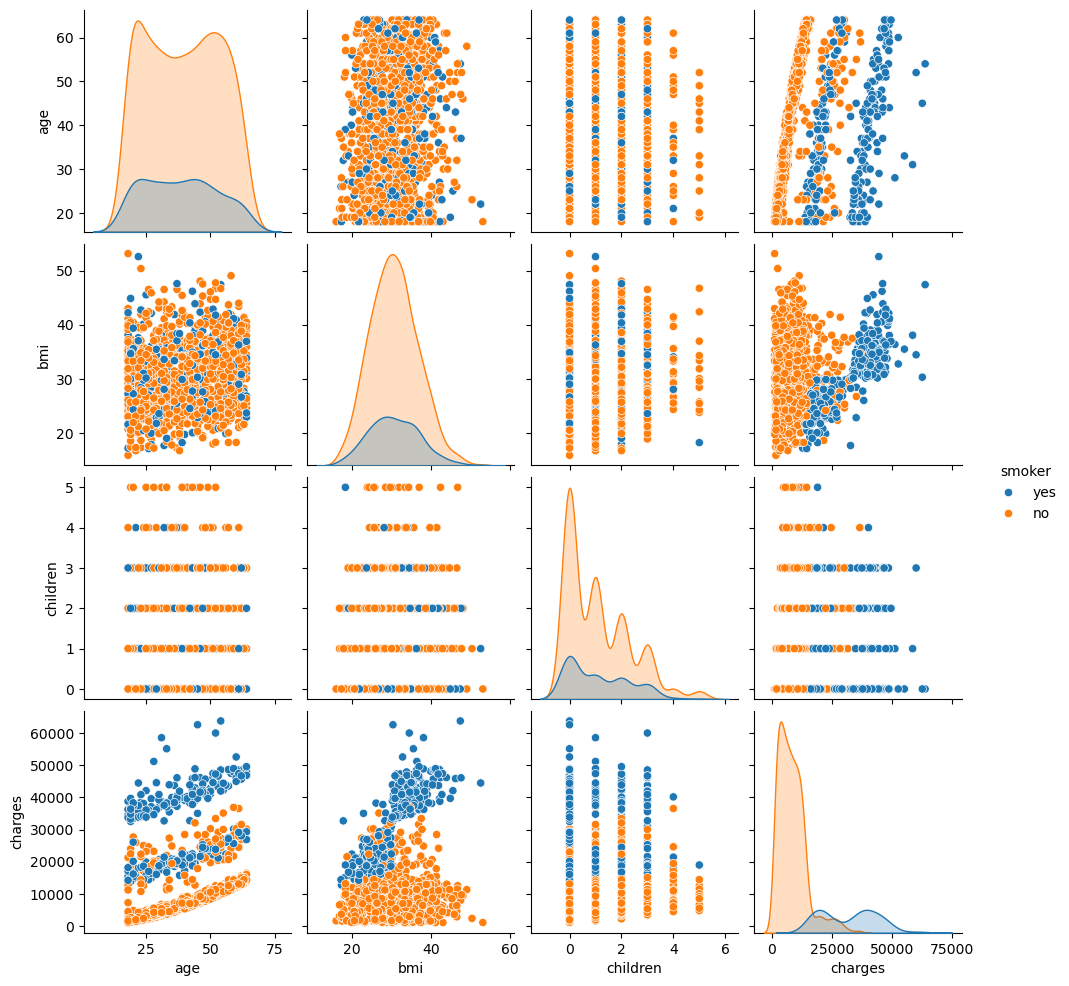

In [47]:
#pairplot
sns.pairplot(df, hue="smoker")
plt.show()

The pairplot shows that smoking status is the most important factor driving high insurance charges. Smokers, especially older individuals with higher BMI, have much higher costs compared to non-smokers. Insurance charges are highly skewed with a few extreme outliers above $60k. Age shows a positive trend with charges, while BMI has an effect mainly for smokers. The number of children does not appear to strongly impact charges.

1. Charges distribution
Highly skewed to the right.
Most people have charges below ~$20k, but some go as high as ~$64k.
Outliers = mostly smokers with high BMI.
2. Smoker vs Non-smoker
Clear separation: smokers tend to have much higher charges than non-smokers.
Even at the same age or BMI, smokers pay more.
This makes smoker one of the strongest predictors of charges.
3. Age
Charges tend to increase with age, especially for smokers.
Older smokers cluster at the very high charge levels.
Non-smokers show a flatter, steadier trend.
4. BMI
For non-smokers → BMI doesn’t strongly influence charges.
For smokers → higher BMI amplifies charges (a synergy effect).
Outliers: a few smokers with BMI > 45 and charges > $60k.
5. Children
Number of children doesn’t show a strong trend with charges.
Most people have 0–2 children regardless of their charge level.

### 3. Make a few plots of your own exploring the data. 


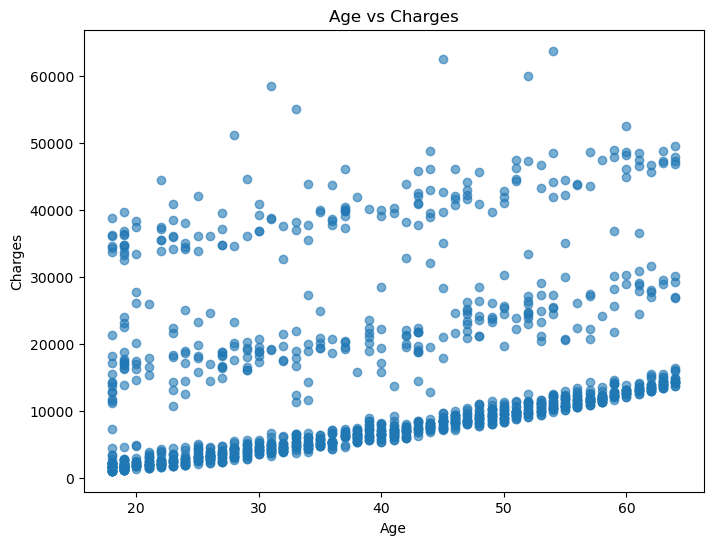

In [48]:
#Age vs Charges
plt.figure(figsize=(8,6))
plt.scatter(df["age"], df["charges"], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Charges")
plt.show()


There is a positive correlation: charges rise with age.
For younger people, charges are generally low, but for older individuals, especially smokers, charges shoot up.
Outliers are clear: a few very high charges > $60k.

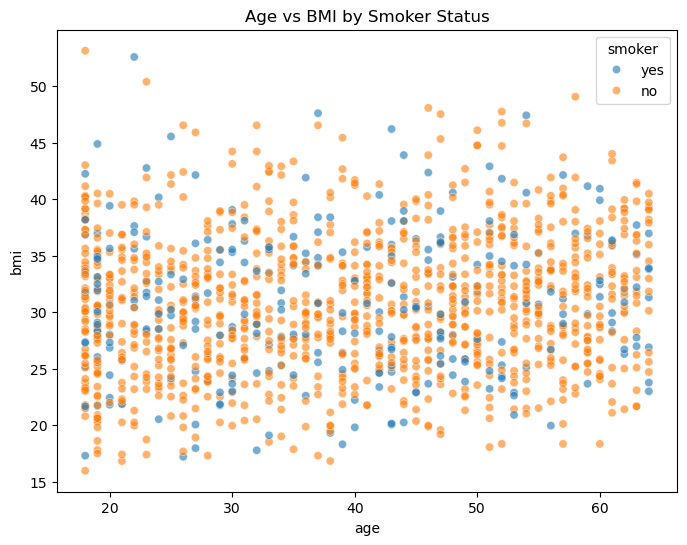

In [49]:
#Age vs BMI split by smoker (Seaborn)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="age", y="bmi", hue="smoker", alpha=0.6)
plt.title("Age vs BMI by Smoker Status")
plt.show()


BMI does not depend strongly on age (points spread widely).
Smokers and non-smokers are scattered similarly, but smokers tend to stand out more at high BMI when combined with high charges.
No strong linear trend, but a few high-BMI smokers could be riskier.

/var/folders/sc/kwjnb94x0y72g71b5qyz2n_c0000gp/T/ipykernel_11144/764812725.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




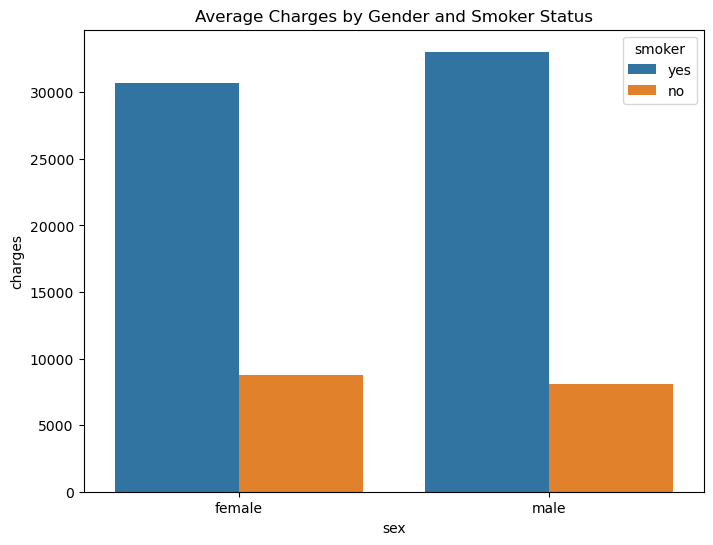

In [50]:
#Average charges: male vs female vs smoker (Seaborn barplot)
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="sex", y="charges", hue="smoker", ci=None)
plt.title("Average Charges by Gender and Smoker Status")
plt.show()


Smokers are charged much more than non-smokers, regardless of sex.
Gender differences are small compared to the smoker effect.

/var/folders/sc/kwjnb94x0y72g71b5qyz2n_c0000gp/T/ipykernel_11144/677052408.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



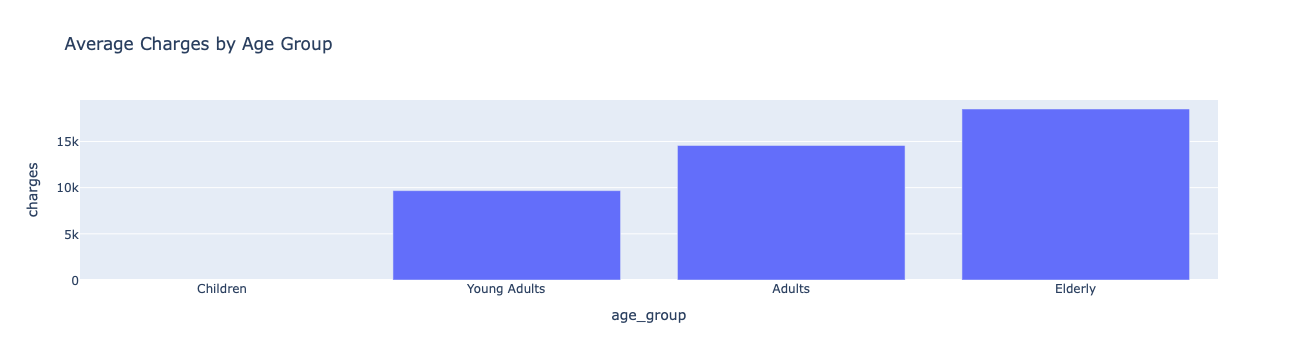

In [51]:
#4. Charges by age groups (Plotly bar chart)

# Define bins
bins = [0, 18, 35, 55, 100]
labels = ["Children", "Young Adults", "Adults", "Elderly"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

age_group_charges = df.groupby("age_group")["charges"].mean().reset_index()

fig = px.bar(age_group_charges, x="age_group", y="charges",
             title="Average Charges by Age Group")
fig.show()


Average charges increase across age groups, with the elderly group paying the most.
The jump between adults and elderly is significant, showing that older age is a strong driver of insurance cost.

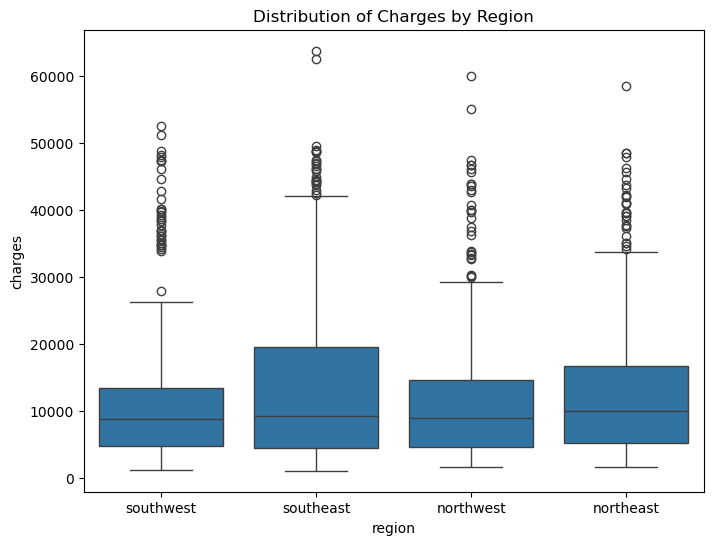

In [52]:
#5. Charges by region (Seaborn boxplot)

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="region", y="charges")
plt.title("Distribution of Charges by Region")
plt.show()


The four regions have similar median charges.
Southeast tends to have slightly higher charges, possibly due to having more smokers.
Extreme outliers appear in all regions (smokers).